In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv("http://rcarbonneau.com/ClusterwiseRegressionDatasets/data_Cheese_scaled.txt", sep="\t", 
                   names=["TasteScore", 
                          "AceticAcidConcentration", 
                          "HydrogenSulfideConcentration", 
                          "LacticAcidConcentration"])
data.head()

,TasteScore,AceticAcidConcentration,HydrogenSulfideConcentration,LacticAcidConcentration
0,1.23,0.4543,0.3135,0.086
1,2.09,0.5159,0.5043,0.153
2,3.90,0.5366,0.5438,0.157
3,4.79,0.5759,0.7496,0.181
4,0.56,0.4663,0.3807,0.099


### Since we wish to fit 2 independent variables against 1 dependent variable, we will select the two most influential independent variables on dependent variable "TasteScore" using the Correlation Matrix. 

In [3]:
data.corr()

,TasteScore,AceticAcidConcentration,HydrogenSulfideConcentration,LacticAcidConcentration
TasteScore,1.000000,0.549539,0.755752,0.704236
AceticAcidConcentration,0.549539,1.000000,0.617956,0.603783
HydrogenSulfideConcentration,0.755752,0.617956,1.000000,0.644812
LacticAcidConcentration,0.704236,0.603783,0.644812,1.000000


### From the first row we find that "HydrogenSulfideConcentration" and "LacticAcidConcentration" have the highest positive correlation on "TasteScore". So, now we will create our final dataset

In [4]:
data = data.iloc[:, [0, 2, 3]]
data.head()

,TasteScore,HydrogenSulfideConcentration,LacticAcidConcentration
0,1.23,0.3135,0.086
1,2.09,0.5043,0.153
2,3.90,0.5438,0.157
3,4.79,0.7496,0.181
4,0.56,0.3807,0.099


In [5]:
X = data.iloc[:, 1:3].values
Y = data.iloc[:, 0:1].values
print("X shape:", X.shape)
print("Y shape:", Y.shape)

X shape: (30, 2)
Y shape: (30, 1)


In [6]:
mul_lr = LinearRegression()
mul_lr.fit(X, Y)

Y_pred = mul_lr.predict(X)

RMSE Score: 	 0.8896551179326401
Intercept: 	 [-2.75918152]
Coefficients: 	 [[ 3.94626734 19.88720448]]


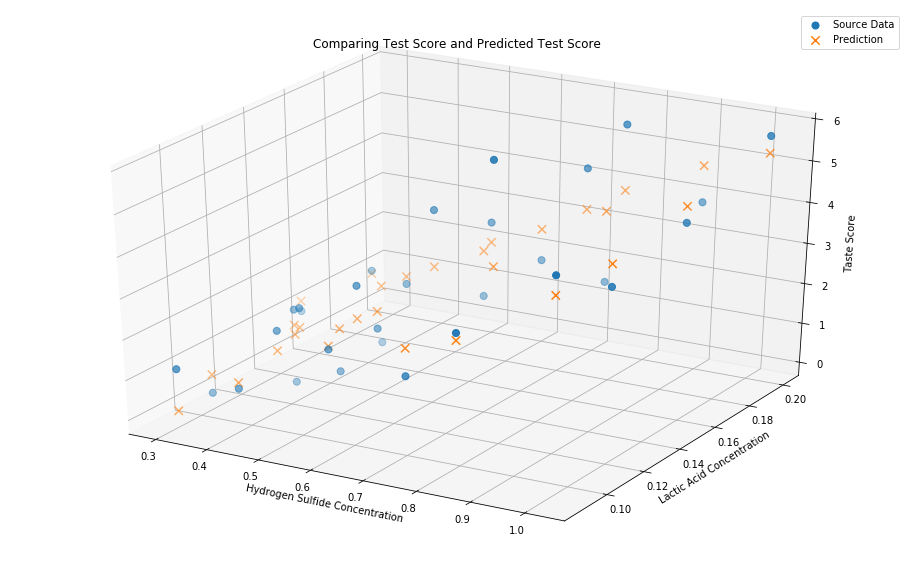

In [7]:
print("RMSE Score: \t", mean_squared_error(Y, Y_pred))
print("Intercept: \t", mul_lr.intercept_)
print("Coefficients: \t", mul_lr.coef_)
fig = plt.figure(figsize=(16,10))
ax = plt.axes(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], Y, s=50)
ax.scatter3D(X[:, 0], X[:, 1], Y_pred, s=70, marker="x")
ax.set_xlabel("Hydrogen Sulfide Concentration")
ax.set_ylabel("Lactic Acid Concentration")
ax.set_zlabel("Taste Score")
ax.legend(["Source Data", "Prediction"])
plt.title("Comparing Test Score and Predicted Test Score")